In [1]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dados= pd.read_csv("Anatel.csv")

linhas= dados.index
colunas= dados.columns

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#### Note #####

Estados= dados["ESTADO"].unique()
Operadoras= dados["OPERADORA"].unique()
Glossario= dict()
Glossario["IDTNS"]= " Identificação  "
Glossario["TIPO"]= " Tipo de Serviço  "
Glossario["OPERADORA"]= "OPERADORA"
Glossario["ESTADO"]= "ESTADO"
Glossario["DATA"]="DATA"
Glossario["ANO_BASE"]="ANO_BASE"
Glossario["Q1"]="Participação da Pesquisa"
Glossario["Q2"]="Área de Trabalho"
Glossario["Q2_1"]="Área de Trabalho pós 2016 1"
Glossario["Q2_2"]="Área de Trabalho pós 2016 2"
Glossario["Q3"]="Cliente de Internet fixa"
Glossario["Q4"]="Principal Usuário"
Glossario["Q5"]="Responsável pelo Pagamento"
Glossario["Q6"]="Pessoa Física ou Jurídica"
Glossario["Q7"]="Idade"
Glossario["Q7a"]="Recusa Idade"
Glossario["Q8"]="Sexo"
Glossario["J1"]="SAT Geral"
Glossario["B1_1"]="SAT Entendimento dos Planos"
Glossario["B1_2"]="SAT Comprometimento com o prometido"
Glossario["C1_1"]="SAT Cobrança Funcionamento"
Glossario["C1_2"]="SAT Conexões sem Queda"
Glossario["C1_3"]="SAT velocidade"
Glossario["D1_1"]="SAT Cobrança Contas a Pagar "
Glossario["D1_2"]="SAT Clareza Info da Conta"
Glossario["A1_1"]="Usou atendimento telefonico ?"
Glossario["A1_2"]="Usou atendimento Internet ?"
Glossario["A1_3"]="Usou atendimento local Físico ?"
Glossario["A1_4"]="Usou atendimento ?"
Glossario["A2_1"]="SAT tempo de espera Atendimento"
Glossario["A2_2"]="SAT Necessidade Repetição"
Glossario["A2_3"]="SAT Esclarecimentos Atendentes"
Glossario["A3"]="SAT Atendimento Telefônico"
Glossario["A4"]="SAT Atendimento Internet"
Glossario["E1"]="Entrou em contato devido a problema de cobrança"
Glossario["E2"]="SAT Resolução Problema Cobrança"
Glossario["E3"]="Entrou em Contato para Alterar Plano"
Glossario["E4"]="SAT Resolução Alteração"
Glossario["E5"]="Entrou em Contato para Cancelar"
Glossario["E6"]="SAT Resolução Cancelamento"
Glossario["E7"]="Entrou em Contato para Problemas"
Glossario["E8"]="SAT a resolução do Problema"
Glossario["F1"]="Solicitou instalação de internet fixa"
Glossario["F2_1"]="SAT Solicitação de Instalação"
Glossario["F2_2"]="SAT Prazo Instalação"
Glossario["F2_3"]="SAT Qualidade Instalação"
Glossario["F3"]="Solicito reparos"
Glossario["F4_1"]="SAT Reparos"
Glossario["F4_2"]="SAT Prazo Reparos"
Glossario["F4_3"]="SAT Qualidade Reparos"
Glossario["G1"]="Existência de Outra Operadora"
Glossario["G2_1"]="Inclui TV?"
Glossario["G2_2"]="Inclui Telefonia Móvel?"
Glossario["G2_3"]="Inclui Telefone Fixo"
Glossario["H0"]="Município"
Glossario["H1"]="IBGE"
Glossario["H2"]="Quantidade de pessoas"
Glossario["H2a"]="Renda"
Glossario["H3"]="Recusa Renda"
Glossario["I1"]="H3"
Glossario["I2"]="Autorização 1"
Glossario["PESO"]="Autorização 2"
Glossario["COD_IBGE"]="PESO"


In [3]:
##Reshape Data

#Dados de Solicitação de Atendimento Telefônico, Online e outro
A_2_Integrate= list()

for i in linhas:
        if  dados.loc[i , "A1_4"] == 97:
            A_2_Integrate.append(0)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(7)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(3)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(1)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(5)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(2)
        elif np.isnan(dados.loc[i, "A1_1"]) and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(4)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
           A_2_Integrate.append(6)



In [4]:
##Data Copy to plot HeatMap
Data_Reshaped = dados.copy()
Data_Reshaped.insert(26, "A_2_Integrate", A_2_Integrate)


for number, i in enumerate(Estados):
    Data_Reshaped.loc[(Data_Reshaped.ESTADO == i),'ESTADO']=number

for number, i in enumerate(Operadoras):
    Data_Reshaped.loc[(Data_Reshaped.OPERADORA == i),'OPERADORA']=  number

Data_Reshaped["ESTADO"] = Data_Reshaped["ESTADO"].astype(str).astype(int)
Data_Reshaped["OPERADORA"] = Data_Reshaped["OPERADORA"].astype(str).astype(int)

Data_Reshaped.rename(columns=Glossario, inplace=True)
##Removing Data
Data_Reshaped.drop("Área de Trabalho", inplace= True, axis = 1)
Data_Reshaped.drop("Área de Trabalho pós 2016 1", inplace= True, axis = 1)
Data_Reshaped.drop("Área de Trabalho pós 2016 2", inplace= True, axis = 1)
Data_Reshaped.drop("Cliente de Internet fixa", inplace= True, axis = 1)
Data_Reshaped.drop("Principal Usuário", inplace= True, axis = 1)
Data_Reshaped.drop("Pessoa Física ou Jurídica", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento telefonico ?", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento Internet ?", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento local Físico ?", inplace= True, axis = 1)
Data_Reshaped.drop("Usou atendimento ?", inplace= True, axis = 1)
Data_Reshaped.drop(" Identificação  ", inplace= True, axis = 1)
Data_Reshaped.drop(" Tipo de Serviço  ", inplace= True, axis = 1)
Data_Reshaped.drop("DATA", inplace= True, axis = 1)
Data_Reshaped.drop("PESO", inplace= True, axis = 1)
Data_Reshaped.drop("IBGE", inplace= True, axis = 1)
Data_Reshaped.drop("Autorização 1", inplace= True, axis = 1)
Data_Reshaped.drop("Autorização 2", inplace= True, axis = 1)
Data_Reshaped.drop("H3", inplace= True, axis = 1)
Data_Reshaped.drop("Participação da Pesquisa", inplace= True, axis = 1)

In [ ]:
##HeatMapPlot

corr_matrix = Data_Reshaped.corr()
f, ax = plt.subplots(figsize=(50, 50))

#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap=cmap)
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 25
)


In [ ]:
##Heat Filter
Data_SAT = Data_Reshaped.copy()


Data_SAT.drop("OPERADORA", inplace= True, axis = 1)
Data_SAT.drop("ESTADO", inplace= True, axis = 1)
Data_SAT.drop("ANO_BASE", inplace= True, axis = 1)
Data_SAT.drop("Idade", inplace= True, axis = 1)
Data_SAT.drop("Recusa Idade", inplace= True, axis = 1)
Data_SAT.drop("Sexo", inplace= True, axis = 1)
Data_SAT.drop("Entrou em contato devido a problema de cobrança", inplace= True, axis = 1)
Data_SAT.drop("Entrou em Contato para Alterar Plano", inplace= True, axis = 1)
Data_SAT.drop("Entrou em Contato para Cancelar", inplace= True, axis = 1)
Data_SAT.drop("Entrou em Contato para Problemas", inplace= True, axis = 1)
Data_SAT.drop("Solicitou instalação de internet fixa", inplace= True, axis = 1)
Data_SAT.drop("Solicito reparos", inplace= True, axis = 1)
Data_SAT.drop("Existência de Outra Operadora", inplace= True, axis = 1)
Data_SAT.drop("Inclui TV?", inplace= True, axis = 1)
Data_SAT.drop("Inclui Telefonia Móvel?", inplace= True, axis = 1)
Data_SAT.drop("Inclui Telefone Fixo", inplace= True, axis = 1)
Data_SAT.drop("Município", inplace= True, axis = 1)
Data_SAT.drop("Quantidade de pessoas", inplace= True, axis = 1)
Data_SAT.drop("Renda", inplace= True, axis = 1)
Data_SAT.drop("Recusa Renda", inplace= True, axis = 1)
Data_SAT.drop("A_2_Integrate", inplace= True, axis = 1)
Data_SAT.drop("Responsável pelo Pagamento", inplace= True, axis = 1)




In [ ]:
corr_matrix = Data_Reshaped.corr()
corr_matrix_Filter = corr_matrix[corr_matrix.abs() > 0.4]

for col in corr_matrix_Filter.columns:
    if corr_matrix_Filter[col].notnull().sum() == 1:
        corr_matrix_Filter.drop(col, inplace= True, axis = 1)
        corr_matrix_Filter.drop(col, inplace= True, axis = 0)


for col in corr_matrix_Filter.columns:
    for idx in corr_matrix_Filter.index:
        corr_matrix_Filter.loc[idx,col] = corr_matrix.loc[idx, col] 

f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heat = sns.heatmap(corr_matrix_Filter, vmin=-1, vmax=1, center=0, annot=True, cmap=cmap, annot_kws={"fontsize":20})
sns.set(font_scale=4)
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 25,
    rotation=0,
    horizontalalignment='right'
)

In [ ]:
corr_matrix_SAT = Data_SAT.corr()
f, ax = plt.subplots(figsize=(50, 50))

#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix_SAT, vmin=-1, vmax=1, center=0, annot=True, cmap=cmap, annot_kws={"fontsize":20})
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 25
)

In [ ]:
##Mean Year

Anos = dados["ANO_BASE"].unique()
Media_Ano = list()


for ano in Anos:
    Media = dados[dados["ANO_BASE"]==ano].mean()
    Media_Ano.append(Media["J1"]) 


Graph = plt.plot(Anos, Media_Ano, 'go-', label = "Satisfação Média por Ano")
plt.rcParams["figure.dpi"] = 100
plt.ylim([0, 10])
plt.xlabel("Ano")
plt.ylabel("Satisfação Média")
plt.show


In [ ]:
##Mean Operadora

Operadoras = dados["OPERADORA"].unique()
Media_Operadora = list()


for i in Operadoras:
    Media = dados[dados["OPERADORA"]==i].mean()
    Media_Operadora.append(Media["J1"]) 


Graph = plt.bar(Operadoras, Media_Operadora)
plt.rcParams["figure.dpi"] = 100
plt.ylim([0, 10])
plt.xlabel("Operadora")
plt.xticks( rotation=45, horizontalalignment='right')
plt.ylabel("Satisfação Média")
plt.show

In [ ]:
Estados = dados["ESTADO"].unique()
Media_Estado = list()


for i in Estados:
    Media = dados[dados["ESTADO"]==i].mean()
    Media_Estado.append(Media["J1"]) 


Graph = plt.bar(Estados, Media_Estado)
plt.rcParams["figure.figsize"]  = (6,4)
plt.rcParams["figure.dpi"] = 100
plt.ylim([0, 10])
plt.xlabel("Estados")
plt.xticks( rotation=45, horizontalalignment='right')
plt.ylabel("Satisfação Média")
plt.show

In [ ]:
dados["J1"].hist(bins = 30 ,figsize=(20,15), align = "mid", range = [0,10] )
plt.rcParams["figure.dpi"] = 100
plt.xticks(range(0,11), size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequência", size = 15)
plt.ylabel("Satisfação Geral", size = 15)
plt.legend()


[0.04912807811770438, 0.012694803656861351, 0.024557272105943415, 0.0347550701394669, 0.050508536511094416, 0.14767521332819045, 0.09662532058439405, 0.17651596662538827, 0.21250262219425214, 0.08173125723218091, 0.11275096936600418]


<Figure size 600x400 with 0 Axes>

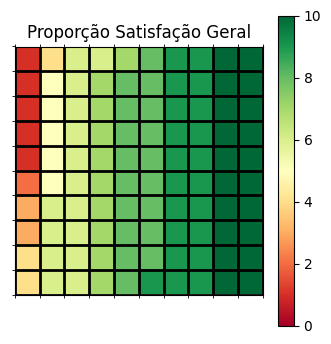

In [67]:
##Wafle Chart

proportion = list()
freq = Data_Reshaped["SAT Geral"].value_counts(sort = False)

print()
for i in range(11):
    proportion.append((freq.iloc[i]/147777))

print(proportion)

tiles_per_category = [round(prop * 100) for prop in proportion]

waffle = np.zeros((10, 10))
category_index = 0
tile_index = 0
for col in range(10):
    for row in range(10):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle[row, col] = category_index

fig = plt.figure()
colormap = plt.cm.RdYlGn
plt.matshow(waffle, cmap=colormap, vmin=0, vmax=10)

ax = plt.gca()
ax.set_xticks(np.arange(-0.5, (10), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (10), 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.rcParams["figure.dpi"] = 100
plt.title("Proporção Satisfação Geral")
plt.xticks([])
plt.yticks([])
plt.colorbar()

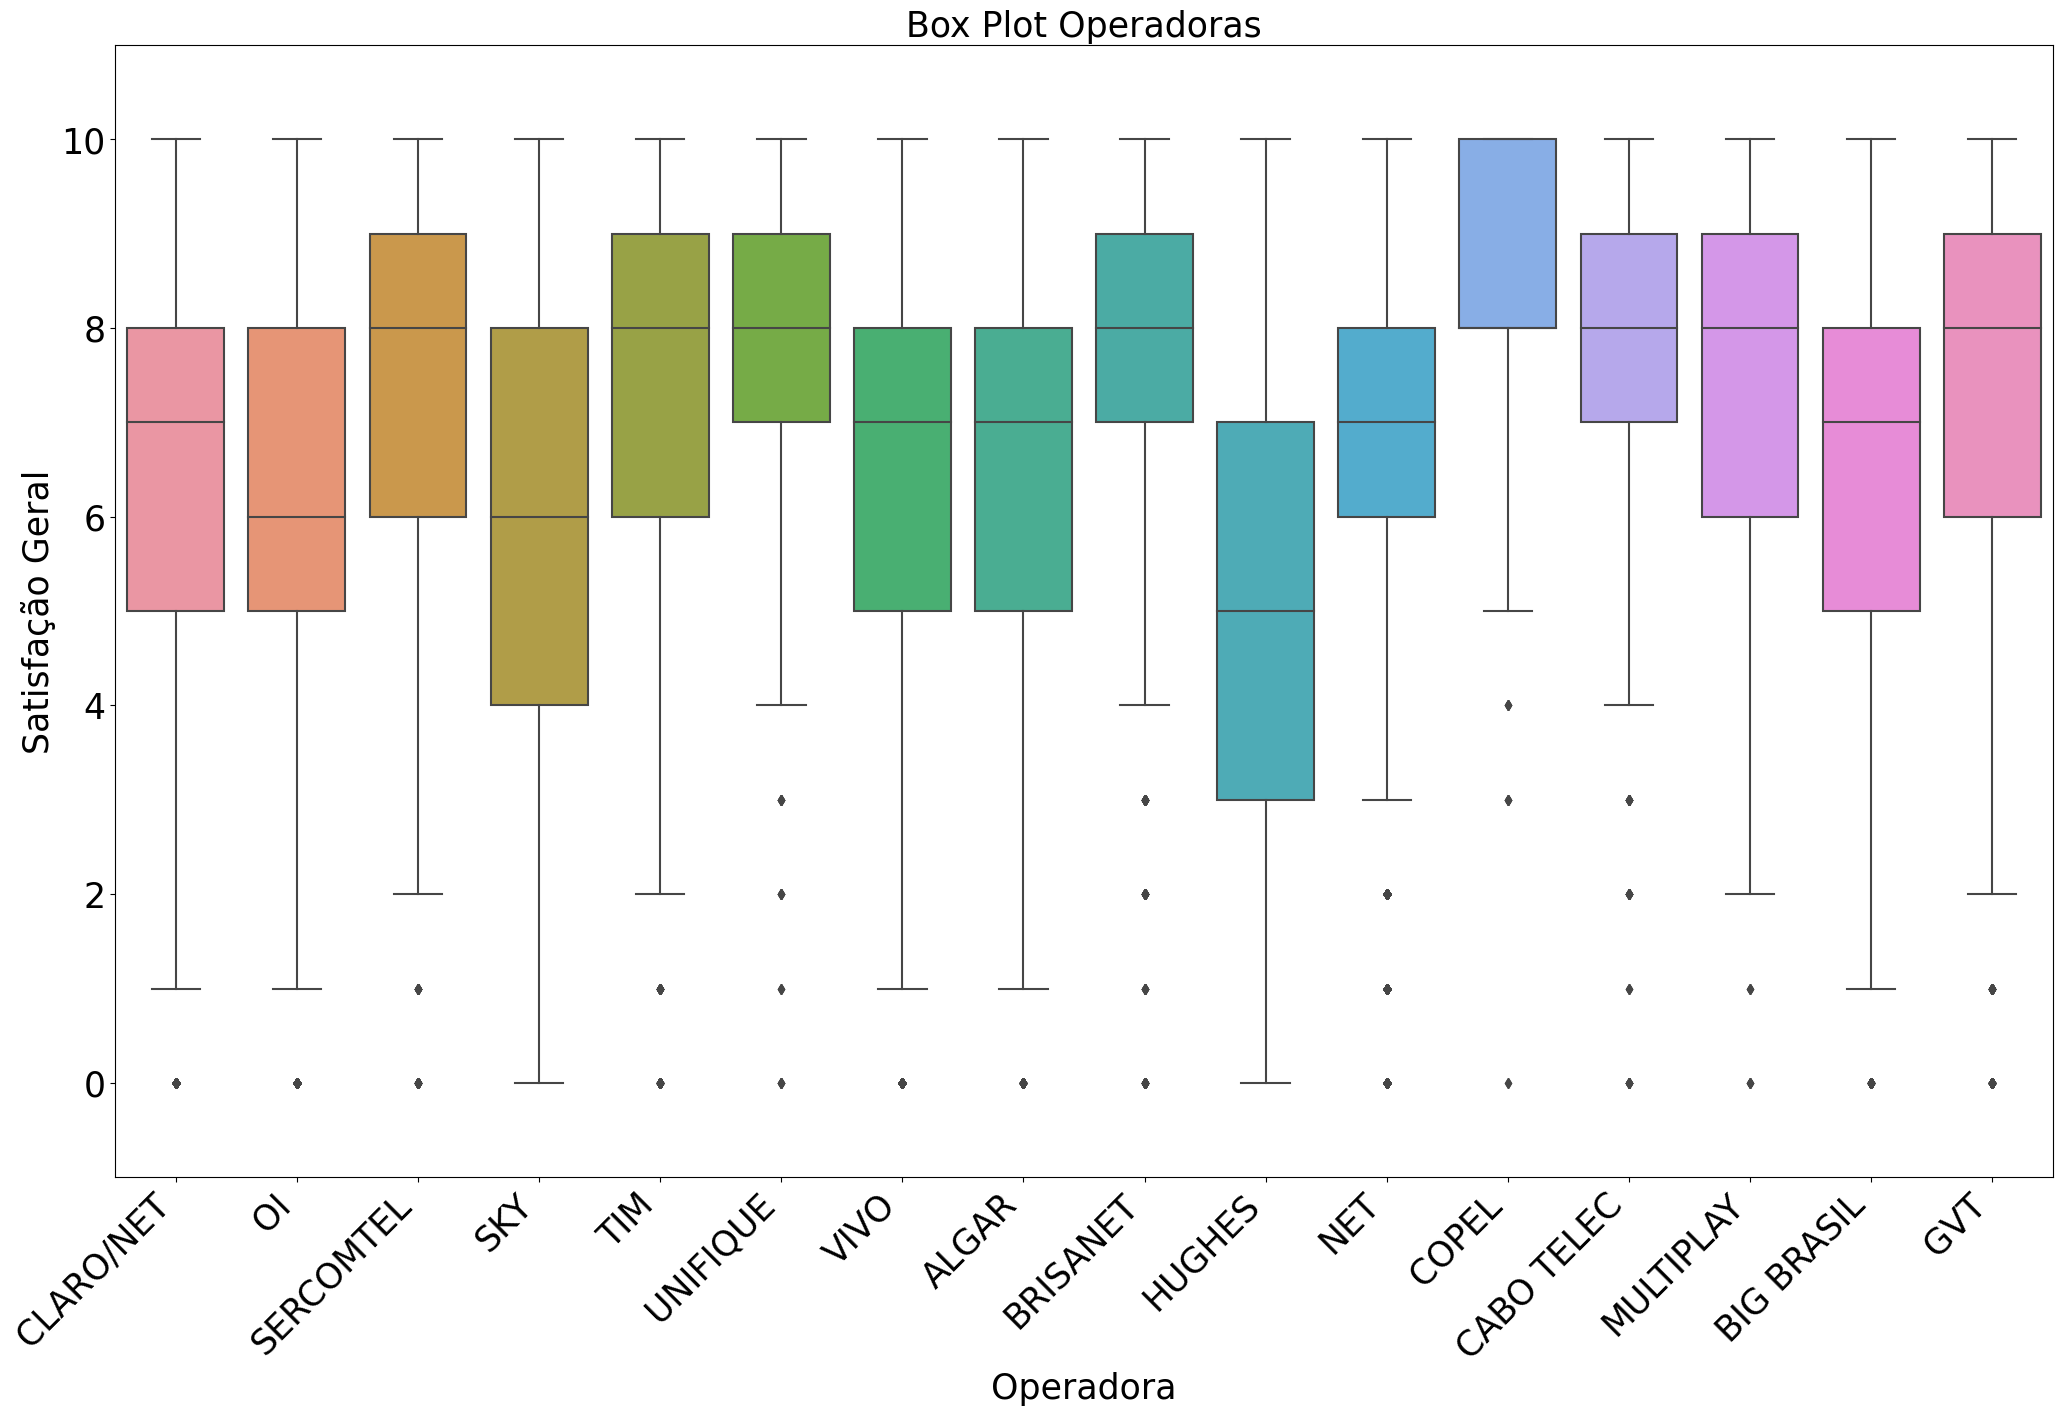

In [44]:
##BoxPlot Operadoras

f, ax = plt.subplots(figsize=(25, 15))
ax = sns.boxplot(x = dados["OPERADORA"], y = dados["J1"], data = dados)
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Operadora", size = 25)
plt.ylabel("Satisfação Geral", size=25)
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
plt.yticks(size = 25)
plt.title("Box Plot Operadoras", size = 25)
ax.set(ylim=(-1, 11))
plt.show()

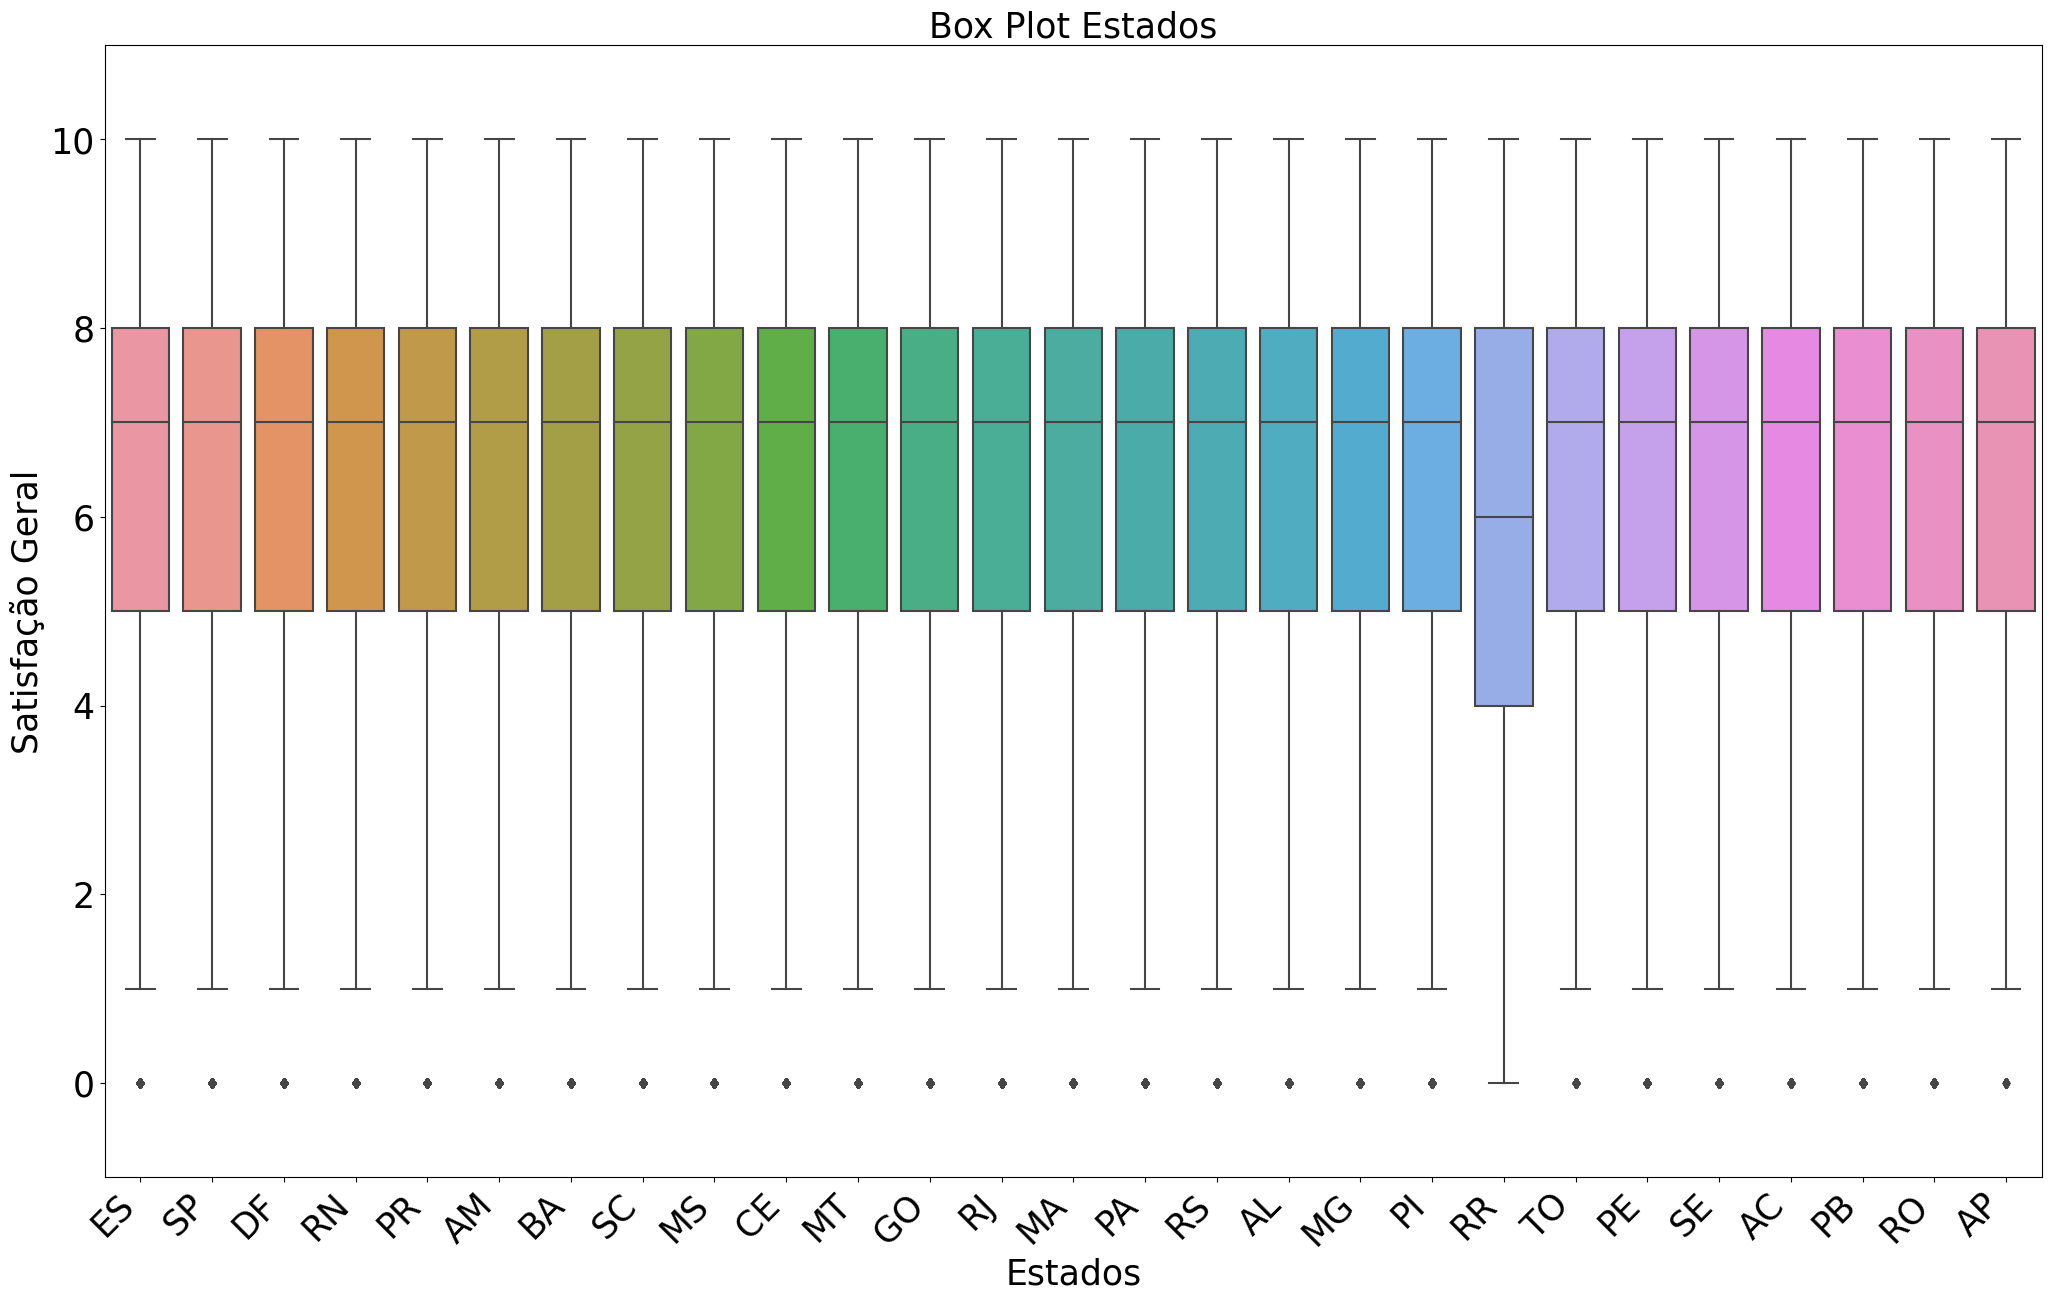

In [46]:
##BoxPlot Estados

f, ax = plt.subplots(figsize=(25, 15))
ax = sns.boxplot(x = "ESTADO", y = "J1", data = dados)
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Estados", size = 25)
plt.ylabel("Satisfação Geral", size=25)
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
plt.yticks(size = 25)
plt.title("Box Plot Estados", size = 25)
ax.set(ylim=(-1, 11))
plt.show()